# Лабораторная работа № 10
# Математический анализ

### Интеграл с переменным верхним пределом

In [1]:
import sympy as sp
sp.init_printing(use_unicode=False, wrap_line=False, no_global=True)
import matplotlib.pyplot as plt
import numpy as np

### Задача 1
Описать функцию $F(x,a)=\int_a^x f(t)\,dt$, зависящую от параметра $a$.

Построить на одном графике $F(x,a)$ для функции $f(t)=t^2\sin{t}$ при $a=1/2,1,2$, $x\in[\pi,\pi]$.

Найти производную построенной $F(x,a)$  и показать, что она равна $f(t)=t^2\sin{t}$.

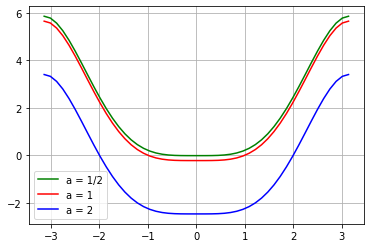

In [2]:
x, y, a, t, u, b = sp.symbols('x y a t u b')
def integratePar(func):
    a = sp.Symbol('a')
    return sp.integrate(func,(t, a, x))
def drawIntegral(func, cur_a, label = "", col = "g"):
    X = np.linspace(-np.pi, np.pi)
    Y = [func.subs(x,x0).subs(a, cur_a) for x0 in X]
    plt.plot(X, Y,'k', color = col, label = label)

    
f = t ** 2 * sp.sin(t)
fA = integratePar(f)
display(f, fA)
drawIntegral(fA, 1/2, "a = 1/2")
drawIntegral(fA, 1, "a = 1", "r")
drawIntegral(fA, 2, "a = 2", "b")
plt.legend()
plt.grid()
#Проверим,что производная найденной первообразной = f
display(sp.diff(fA.subs(a, 0)))

### Задача 2.
$$
sign(x)=\left\{\begin{matrix}
-1,\quad t<0\\
0,\quad t=0\\
1,\quad t>0
\end{matrix}\right.
$$
Описать функцию $F(x)=\int_{-1}^x sign(t)\,dt$, показать, что для нее выполняется формула Ньютона-Лейбница для любых конечных $a$ и $b$.

In [3]:
sign = sp.Piecewise((-1, t < 0), (0, t == 0), (1, t > 0))
F = sp.integrate(sign,(t, -1, x))
display(F, 
        sp.integrate(sign, t).subs(t, x) - sp.integrate(sign, t).subs(t, -1), 
        sp.integrate(sign, t).subs(t,2) - sp.integrate(sign,t).subs(t, -1), 
        sp.integrate(sign,(t, -1, 2)))

/      -x - 1         for x < -1
<                               
\x - 2*Min(0, x) - 1  otherwise 

//-x  for x < 0\    
|<             | - 1
\\x   otherwise/    

### Задача 3.
Построить график зависимости  от $x$ площади под графиком функции $\sin t$ на отрезке $[0,x]$. Воспользоваться периодичностью функции.

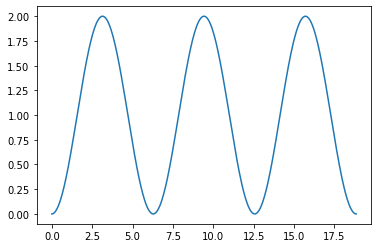

In [4]:
X = np.linspace(0, 6 * np.pi, 512)
function = sp.integrate(sp.sin(t), (t, 0, x))
Y = [function.subs(x, x0) for x0 in X]
plt.plot(X, Y)
plt.grid()

### Задача 4.
Даны пересекающиеся эллипсы 
$$
4(x-2)^2 +9(y+1)^2 =36,\qquad 25(x+1)^2 +4y^2 =100
$$

Составить две кусочные функции, описывающие верхнюю и нижнюю границы фигуры, полученной объединением эллипсов.

Воспользоваться solve() для того, чтобы выразить $y$ из уравнений, solveset для вычисления точек пересечения эллипсов.

Построить графики эллипсов, пользуясь полученными кусочными функциями и plot пакета SymPy.

Вычислить площадь фигуры, образованной объединением эллипсов.

In [10]:
def points(y, a, b , n, v):
    X, Y = np.linspace(a, b, n), []
    for i in X:
        Y += [float(y.subs(v, i))]
    return X, Y
x, y = sp.symbols('x y')

Площадь:


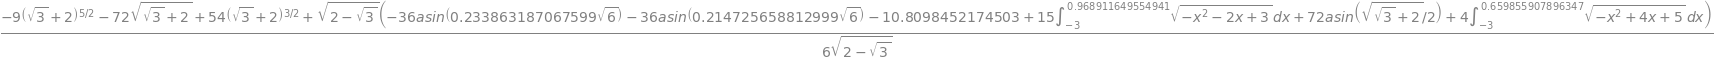

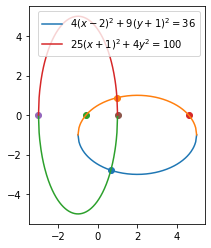

In [15]:
f1 = 4 * (x - 2)**2 + 9 * (y + 1)**2 - 36
f2 = 25 * (x + 1)**2 + 4 * y**2 - 100

y11, y12 = sp.solve(f1, y)
y21, y22 = sp.solve(f2, y)
x1, y1 = points(y11, -1, 5, 128, x)

x2, y2 = points(y12, -1, 5, 128, x)
plt.plot(x1, y1, label = "$4(x-2)^2 +9(y+1)^2 =36$")
plt.plot(x2, y2,)

x1, y1 = points(y21, -3, 1, 128, x)
x2, y2 = points(y22, -3, 1, 128, x)
plt.plot(x1, y1)
plt.plot(x2, y2, label = "$25(x+1)^2 +4y^2 =100$")

plt.legend()

# Общие точки и точки пересечения с OX
inter1 = float(list(sp.solveset(y11 - y21, x, domain = sp.S.Reals))[0])
inter2 = float(list(sp.solveset(y12 - y22, x, domain = sp.Reals))[0])
point1, point2 = sp.solveset(y12, x)
point3, point4 = sp.solveset(y22, x)

# Точки
plt.scatter(inter1, y11.subs(x, inter1))
plt.scatter(inter2, y12.subs(x, inter2))
plt.scatter(point1, y21.subs(x, point3))
plt.scatter(point2, y12.subs(x, point2))
plt.scatter(point3, y21.subs(x, point3))
plt.scatter(point4, y12.subs(x, point2))
plt.gca().set_aspect('equal')
plt.grid()

S = -sp.integrate(y21, (x, point3, inter2)) - sp.integrate(y11, (x, inter2, point2)) + sp.integrate(y12, (x, inter1, point2)) + sp.simplify(sp.integrate(y12, (x, point3, inter1)))
print("Площадь:")
display(sp.simplify(S))

### Задача 5.
В неопределенном интеграле $\int \frac1{2\sqrt x}e^{\sqrt x},\,dx$ провести замену переменной так, чтобы $x=u^2$.
В определенном интеграле $\int_0^2 (x-1)^3e^{(x-1)^4},\,dx$ провести замену переменной так, чтобы $u=(x-1)^4$.

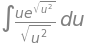

In [13]:
f1 = sp.Integral(sp.S(1) / (2 * sp.sqrt(x)) * sp.E**sp.sqrt(x))
f2 = sp.Integral((x - 1)**3 * sp.E**((x - 1)**4), (x, 0, 2))
display(sp.simplify(sp.expand(f1.transform(x, u**2))), sp.simplify(sp.expand(f2.transform((x-1)**4,u))))

### Индивидуальное задание
Построить график функции $f(x)$ на $[a,b]$, вычислить площадь под графиком и построить график с подписью в легенде, как на рисунке (см. ЛМС). Воспользоваться функцией latex пакета SymPy (не забудьте $)

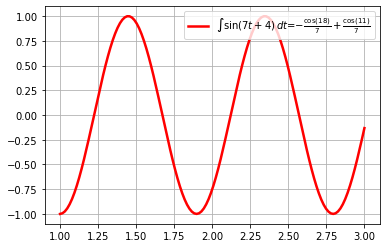

In [9]:
# sin(7t + 4), [1,3]
f = sp.sin(7 * t + 4)
x1, y1 = points(f, 1, 3, 128, t)
f = r'$'+ sp.latex(sp.Integral(f, t)) + '$' + '=' + '$' + sp.latex(sp.integrate(f, (t, 1, 2)))+r'$'
plt.plot(x1, y1, color = "r", linewidth = 2.5,label = f)
plt.legend(loc = "upper right")
plt.grid()